In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
np.random.seed(0)

[-6, 6, -3, 3]

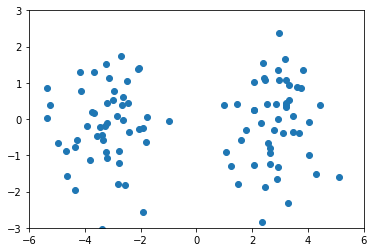

In [8]:
X = np.vstack([np.random.randn(50,2) + [-3,0], np.random.randn(50,2) + [3,0]])
plt.scatter(X[:,0], X[:,1])
plt.axis([-6,6,-3,3])

Text(2.97628,-0.246181,'$\\mu^{(2)}$')

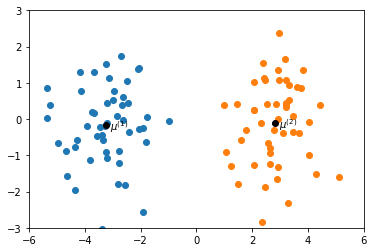

In [11]:
mu1 = X[:50,:].mean(axis=0)
mu2 = X[50:,:].mean(axis=0)
plt.scatter(X[:50,0], X[:50,1], c='C0')
plt.scatter(X[50:,0], X[50:,1], c='C1')
plt.scatter(mu1[0], mu1[1], marker='o', c="k")
plt.scatter(mu2[0], mu2[1], marker='o', c='k')
plt.axis([-6,6,-3,3])
plt.text(mu1[0]+0.15, mu1[1]-0.15, "$\mu^{(1)}$")
plt.text(mu2[0]+0.15, mu2[1]-0.15, "$\mu^{(2)}$")

In [37]:
colors = np.array(["C0", "C1", "C2"])
def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*np.dot(X,Mu.T) + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k')
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

(array([[-2.56450728,  0.16700017],
        [-4.04515638, -0.54442648],
        [ 2.82628142, -0.09618068]]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 1.701805965647862)

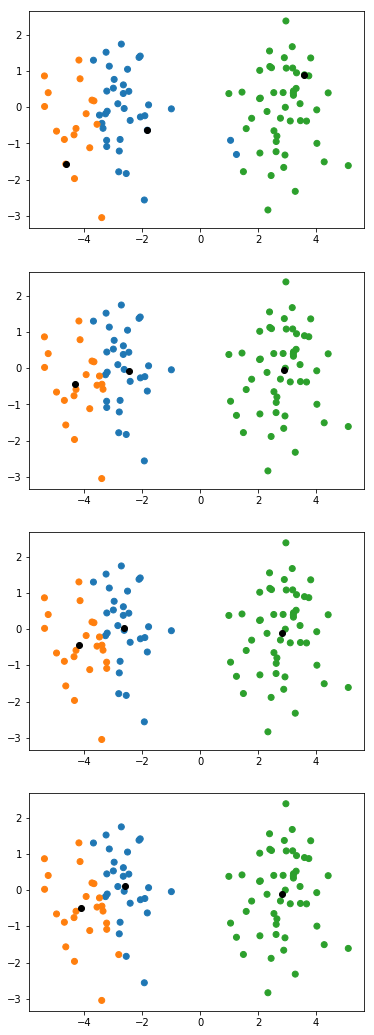

In [40]:
kmeans_visualize(X, 3, max_iter=4, rand_seed = 3)

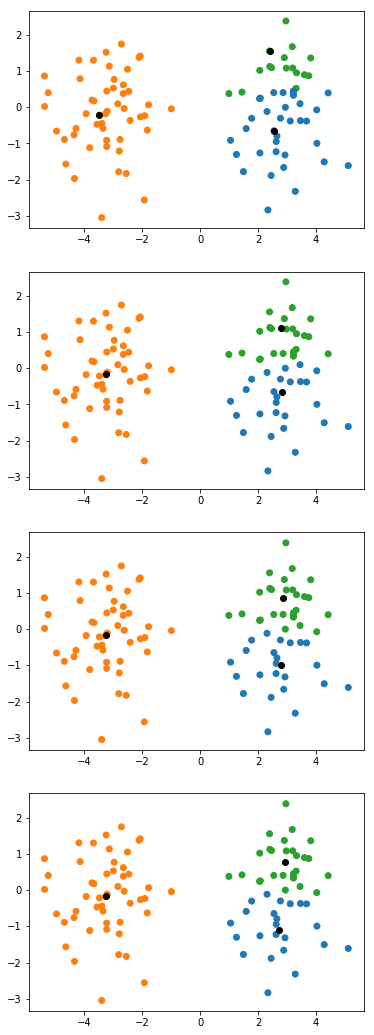

In [39]:
kmeans_visualize(X, 3, max_iter=4, rand_seed=13);

In [41]:
import pandas as pd
from scipy.sparse import csr_matrix

arr = np.random.random(size=(1000, 5))
arr[arr < .9] = 0
arr

/home/karthikb/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karthikb/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.91330145, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.93265045, 0.        ],
       [0.        , 0.98313303, 0.        , 0.        , 0.        ]])

In [42]:
sp_arr = csr_matrix(arr)
sp_arr

<1000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 461 stored elements in Compressed Sparse Row format>

In [45]:
sdf = pd.SparseDataFrame(sp_arr)
csr_matrix(sdf.to_coo())

<1000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 461 stored elements in Compressed Sparse Row format>